In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

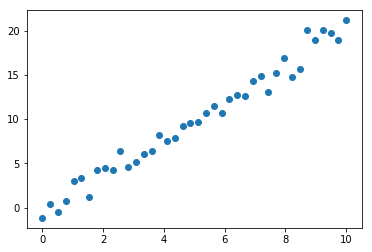

In [4]:
x = np.linspace(0, 10, 40)
y = 2 * x + np.random.normal(loc=0.0, scale=1.0, size=x.shape)
plt.scatter(x, y)

In [7]:
# 输入应为 numpy 数组
def f(x, w, b):
    return w * x + b

def loss(x, y, w, b):
    return 1/2. * np.mean((f(x, w, b) - y) ** 2)

def dw(x, y, w, b):
    return np.mean((f(x, w, b) - y) * x)

def db(x, y, w, b):
    return np.mean((f(x, w, b) - y))

w = np.random.randn(1)[0]
b = np.random.randn(1)[0]
n_epochs = 100
lr = 0.001

def train(x, y, w, b, n_epochs, lr):
    for i in range(n_epochs):
        w -= lr * dw(x, y, w, b)
        b -= lr * db(x, y, w, b)
    return w, b

print('init value: w: {}, b: {}, loss: {}'.format(w, b, loss(x, y, w, b)))
w, b = train(x, y, w, b, n_epochs, lr)
print('final value: w: {}, b: {}, loss: {}'.format(w, b, loss(x, y, w, b)))

init value: w: -0.1377898444206305, b: -0.704131352058321, loss: 85.73113606777557
final value: w: 1.9975697647585027, b: -0.4015253712705954, loss: 0.5321591768657171


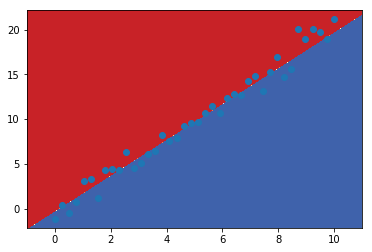

In [8]:
def predict(x, y, w, b):
    return (w * x + b) > y

def plot_surface(x, y, w, b):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = predict(xx.ravel(), yy.ravel(), w, b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(x, y)
    
plot_surface(x, y, w, b)

## 寻找函数的极值点

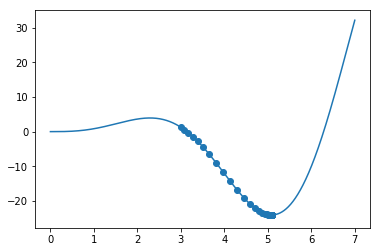

In [18]:
def f(x):
    return x**2 * np.sin(x)


def df(x):
    return 2 * x * np.sin(x) + x**2 * np.cos(x)

x = np.linspace(0, 7, 2000)
y = f(x)

points = []

def find_minimum(x, eps, lr, points):
    x0 = x
    points.append(x)
    while True:
        x = x0 - lr * df(x0)
        if np.abs(f(x) - f(x0)) < eps:
            break
        points.append(x)
        x0 = x

x0 = 3
eps = 1e-10
lr = 0.01
plt.plot(x, y)
# plt.scatter(x0, f(x0))
find_minimum(x0, eps, lr, points)
plt.scatter(np.array(points), f(np.array(points)))